In [1]:
import tensorflow as tf
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
import struct

try:
  from ieee754 import IEEE754
  print("imported")
except:
  ImportError

x = np.linspace(-5, 5, 30)

def hex_to_ieee754(hex_value):
  if len(hex_value) != 8:
    raise ValueError("Invalid hexadecimal string length. Must be 8 characters.")

  # Convert hex to bytes and unpack as a float
  bytes_value = bytes.fromhex(hex_value)
  return struct.unpack('>f', bytes_value)[0]


def convert_hex_to_decimal(hex_values):
    decimal_values = []
    for hex_value in hex_values:
        try:
            decimal_value = hex_to_ieee754(hex_value)
            decimal_values.append(decimal_value)
        except ValueError as e:
            print(f"Error processing {hex_value}: {e}")
    return decimal_values

2024-12-22 03:24:58.524314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 03:24:58.526742: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 03:24:58.534603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-22 03:24:58.546783: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-22 03:24:58.550274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 03:24:58.560584: I tensorflow/core/platform/cpu_feature_gu

imported


In [2]:
def percentage_error(hw, sw):
    return 100 * np.abs((np.array(hw) - np.array(sw)) / np.array(sw))

def calculate_stats(errors):
    return {
        "Mean Error (%)": np.mean(errors),
        "Median Error (%)": np.median(errors),
        "Max Error (%)": np.max(errors),
        "Min Error (%)": np.min(errors),
    }

def plot_activation_analysis(x, hw_data, sw_data, errors, titles, main_title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[1, 1])
    fig.suptitle(main_title, fontsize=16, y=0.98)
    
    # Plot hardware vs software comparison
    for hw, label in zip(hw_data, titles):
        ax1.plot(x, hw, '--', label=f'{label}')
    ax1.plot(x, sw_data, 'k-', label='Software', linewidth=2)
    ax1.grid(True)
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax1.set_xlabel('Input')
    ax1.set_ylabel('Output')
    ax1.set_title('Hardware vs Software Implementation', pad=20)
    
    # Extract number of terms from titles (e.g., '5-terms' -> 5)
    term_numbers = [int(title.split('-')[0]) for title in titles]
    
    # Calculate average error for each number of terms
    avg_errors = [np.mean(error) for error in errors]
    
    # Sort the data points by number of terms to ensure proper plotting order
    sorted_indices = np.argsort(term_numbers)
    term_numbers = np.array(term_numbers)[sorted_indices]
    avg_errors = np.array(avg_errors)[sorted_indices]
    errors = [errors[i] for i in sorted_indices]
    
    # Plot percentage error vs number of terms
    ax2.plot(term_numbers, avg_errors, 'b-o', linewidth=2)
    ax2.grid(True)
    ax2.set_xlabel('Number of Terms')
    ax2.set_ylabel('Average Error (%)')
    ax2.set_title('Percentage Error vs Number of Terms', pad=20)
    
    # Add error bars showing min/max error for each term count
    min_errors = [np.min(error) for error in errors]
    max_errors = [np.max(error) for error in errors]
    ax2.fill_between(term_numbers, min_errors, max_errors, alpha=0.2, color='blue',
                     label='Error Range')
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Add extra space at the top for the main title and on the right for legends
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, right=0.85)
    
    return fig

In [3]:
TanH_5 = [
  "3f807910", "3f80b1e8", "3f810dd4",
  "3f81a8d2", "3f82bba8", "3f84c26b",
  "3f88e885", "3f926f0b", "3facd8fc",
  "400f5b2f", "c112c753", "bfa09772",
  "bf3d862b", "bef4510c", "be2ed30a",
  "3e2ed26a", "3ef359c4", "3f31f2fe",
  "3f547e38", "3f67cf2a", "3f724160",
  "3f77ee64", "3f7b172e", "3f7ce80e",
  "3f7dfc7e", "3f7ea662", "3f7f1210",
  "3f7f5844", "3f7f8738", "3f7fa75a"
]
TanH_5_HW = convert_hex_to_decimal(TanH_5)

TanH_10 = [
  "3f7f9e72", "3f7f3112", "3f7e2eb6",
  "3f7ba1e6", "3f74b42c", "3f609d03",
  "3f25fd8d", "3dd96226", "bf10c188",
  "bf5fed32", "bf679ee4", "bf55ce44",
  "bf3282e1", "bef37da6", "be2ed2a2",
  "3e2ed2a4", "3ef37da8", "3f3283aa",
  "3f55f302", "3f69fe5e", "3f74b32e",
  "3f7a3db0", "3f7d101c", "3f7e7dca",
  "3f7f3726", "3f7f95ce", "3f7fc6c2",
  "3f7fe07c", "3f7fee42", "3f7ff5ca"
]
TanH_10_HW = convert_hex_to_decimal(TanH_10)

TanH_15 = [
  "3f80dc4b", "3f82a5a6", "3f890afa",
  "3fa4e4b8", "404d610e", "c0135ef6",
  "bf9216c4", "bf8101d2", "bf7ac7c3",
  "bf74c1a4", "bf6a00ca", "bf55f378",
  "bf3283b6", "bef37da6", "be2ed2a2",
  "3e2ed2a4", "3ef37da8", "3f3283b2",
  "3f55f374", "3f6a0074", "3f74b88e",
  "3f7a4720", "3f7d1cd2", "3f7e8bf6",
  "3f7f44e8", "3f7fa1dc", "3f7fd08a",
  "3f7fe7fe", "3f7ff3ca", "3f7ff9be"
]
TanH_15_HW = convert_hex_to_decimal(TanH_15)

TanH_20 = [
  "3f5c6fb0", "3f01b7a0", "be6f956a",
  "bf4cffdb", "bf773a2a", "bf7e34fc",
  "bf7e7137", "bf7d1b51", "bf7a4726",
  "bf74b883", "bf6a006f", "bf55f378",
  "bf3283b6", "bef37da6", "be2ed2a2",
  "3e2ed2a4", "3ef37da8", "3f3283b2",
  "3f55f374", "3f6a0074", "3f74b890",
  "3f7a4726", "3f7d1ce6", "3f7e8c1c",
  "3f7f4522", "3f7fa22c", "3f7fd0e6",
  "3f7fe85c", "3f7ff422", "3f7ffa0a"
]
TanH_20_HW = convert_hex_to_decimal(TanH_20)

TanH_25 = [
  "bfb86d82", "bf8796c2", "bf80fd80",
  "bf80092a", "bf7faa32", "bf7f4593",
  "bf7e8c2e", "bf7d1d00", "bf7a4726",
  "bf74b883", "bf6a006f", "bf55f378",
  "bf3283b6", "bef37da6", "be2ed2a2",
  "3e2ed2a4", "3ef37da8", "3f3283b2",
  "3f55f374", "3f6a0074", "3f74b890",
  "3f7a4726", "3f7d1ce6", "3f7e8c1c",
  "3f7f4524", "3f7fa22c", "3f7fd0e8",
  "3f7fe85e", "3f7ff424", "3f7ffa0c"
]
TanH_25_HW = convert_hex_to_decimal(TanH_25)

TanH_30 = [
  "bf7faccd", "bf8000d4", "bf7ff864",
  "bf7fd403", "bf7fa330", "bf7f4593",
  "bf7e8c2e", "bf7d1d00", "bf7a4726",
  "bf74b883", "bf6a006f", "bf55f378",
  "bf3283b6", "bef37da6", "be2ed2a2",
  "3e2ed2a4", "3ef37da8", "3f3283b2",
  "3f55f374", "3f6a0074", "3f74b890",
  "3f7a4726", "3f7d1ce6", "3f7e8c1c",
  "3f7f4524", "3f7fa22c", "3f7fd0e8",
  "3f7fe85e", "3f7ff424", "3f7ffa0c"
]
TanH_30_HW = convert_hex_to_decimal(TanH_30)

In [4]:
Sigmoid_3 = [
  "3f8b4b4b", "3f8ed38b", "3f9419da",
  "3f9c7835", "3faaffab", "3fc858ce",
  "400ce582", "41101192", "bfc50766",
  "be9d537c", "3cea9690", "3e3e66c5",
  "3e92ffc5", "3ebeaffe", "3ee9faec", 
  "3f0b0154", "3f204414", "3f335cf2",
  "3f437439", "3f5066e2", "3f5a876e",
  "3f625600", "3f68535e", "3f6cedb8",
  "3f707c40", "3f734144", "3f756e48",
  "3f7727fe", "3f78898c", "3f79a722"
]
Sigmoid_3_HW = convert_hex_to_decimal(Sigmoid_3)

Sigmoid_6 = [
  "3f674f0a", "3f5aa1c0", "3f4766ea",
  "3f2bb252", "3f07ad22", "3ec059dc",
  "3e78bb96", "3e23da1a", "3e05a55d",
  "3e1068ff", "3e35873b", "3e6c2a70",
  "3e980854", "3ebf3b28", "3ee9fc4c",
  "3f0b01da", "3f206272", "3f33fd6e",
  "3f450b47", "3f533338", "3f5e7e24",
  "3f673730", "3f6dc9dc", "3f72a76c",
  "3f7636b4", "3f78cd18", "3f7aad70",
  "3f7c0a12", "3f7d07ee", "3f7dc1b6"
]
Sigmoid_6_HW = convert_hex_to_decimal(Sigmoid_6)

Sigmoid_9 = [
  "400d60c5", "c11ee6a1", "bf3ab695",
  "be589a1e", "bd659120", "3bfa94aa",
  "3d299d7e", "3d8a2310", "3dc39494",
  "3e058595", "3e330515", "3e6bc692",
  "3e98043a", "3ebf3b10", "3ee9fc4c",
  "3f0b01da", "3f206277", "3f33fde2",
  "3f450e49", "3f533dcc", "3f5e9760",
  "3f67659a", "3f6e10e0", "3f73064a",
  "3f76a920", "3f794cb4", "3f7b3366",
  "3f7c9034", "3f7d8960", "3f7e3b0e"
]
Sigmoid_9_HW = convert_hex_to_decimal(Sigmoid_9)

Sigmoid_12 = [
  "3e05ef37", "3d8140ba", "3d0aee84",
  "3cd2fe0a", "3ce7a91c", "3d1798ef",
  "3d500015", "3d8f7af0", "3dc4cfe9",
  "3e05a1b9", "3e330892", "3e6bc6cc",
  "3e98043a", "3ebf3b10", "3ee9fc4c",
  "3f0b01da", "3f206277", "3f33fde2",
  "3f450e4c", "3f533dda", "3f5e9798",
  "3f676644", "3f6e1266", "3f73092c",
  "3f76add4", "3f795386", "3f7b3c5e",
  "3f7c9b1c", "3f7d95ce", "3f7e487e"
]
Sigmoid_12_HW = convert_hex_to_decimal(Sigmoid_12)

Sigmoid_15 = [
  "3a92c1e3", "3bfa2b4b", "3c507c94", 
  "3c97466a", "3cd544e4", "3d151a48", 
  "3d4f6ad4", "3d8f6c81", "3dc4cdb7", 
  "3e05a195", "3e330892", "3e6bc6cc", 
  "3e98043a", "3ebf3b10", "3ee9fc4c", 
  "3f0b01da", "3f206277", "3f33fde2", 
  "3f450e4c", "3f533dda", "3f5e9798", 
  "3f676646", "3f6e126a", "3f730936", 
  "3f76adec", "3f7953b2", "3f7b3caa", 
  "3f7c9b92", "3f7d9674", "3f7e4958"
]
Sigmoid_15_HW = convert_hex_to_decimal(Sigmoid_15)

In [5]:
SeLu_2 = [
  "4148caa5", "412574c3", "41054dd2",
  "40d0aba2", "409d1986", "405fca9c",
  "40121df4", "3fa25a2a", "3ee7c007",
  "be28151d", "bf14fb6b", "bf4d0272",
  "bf521a5a", "bf244328", "be86f9a4",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_2_HW =  convert_hex_to_decimal(SeLu_2)

SeLu_4 = [
  "41aa1d74", "416f2f49", "41210722",
  "40cbdf82", "4069dd6d", "3fdc6857",
  "3ed0197b", "bedf8f46", "bf6d8fb7",
  "bf951022", "bf9c1fd0", "bf9252d5",
  "bf75fbd9", "bf2cdd3f", "be87acea",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_4_HW =  convert_hex_to_decimal(SeLu_4)

SeLu_6 = [
  "416007ff", "4101dd8a", "40871977",
  "3fde0703", "3e5a9f5c", "bf2a96ea",
  "bf917646", "bfad60de", "bfb60758",
  "bfb303a3", "bfa80752", "bf95f97b",
  "bf77706c", "bf2cfc2a", "be87ad2d",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_6_HW =  convert_hex_to_decimal(SeLu_6)

SeLu_8 = [
  "4088d0d4", "3fc52eb7", "bc310d5a",
  "bf58e5ee", "bfa26de7", "bfbae2c2",
  "bfc38091", "bfc3a1c2", "bfbeb8d3",
  "bfb5e02b", "bfa8c548", "bf961bef",
  "bf777749", "bf2cfc5c", "be87ad2d",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_8_HW =  convert_hex_to_decimal(SeLu_8)

SeLu_10 = [
  "be68f4ee", "bf7d5e98", "bfadd986",
  "bfc2d100", "bfcab145", "bfcc20a4",
  "bfca29d2", "bfc5e583", "bfbf602f",
  "bfb60706", "bfa8cbef", "bf961ca7",
  "bf77775d", "bf2cfc5c", "be87ad2d",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_10_HW =  convert_hex_to_decimal(SeLu_10)

SeLu_12 = [
  "bfb5f2e8", "bfc7c000", "bfcea870",
  "bfd083f8", "bfcff1d9", "bfcdf232",
  "bfcab837", "bfc60ad0", "bfbf6832",
  "bfb6085a", "bfa8cc16", "bf961cac",
  "bf77775d", "bf2cfc5c", "be87ad2d",
  "3e3980c8", "3f0b2097", "3f67e0fb",
  "3fa250b1", "3fd0b0e2", "3fff1115",
  "4016b8a4", "402de8bc", "404518d5",
  "405c48ef", "40737908", "40855491",
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_12_HW =  convert_hex_to_decimal(SeLu_12)

SeLu_14 = [
  "bfd0f0a2", "bfd2d1bb", "bfd2e0be",
  "bfd1fe71", "bfd069ce", "bfce13ef",
  "bfcac06b", "bfc60c82", "bfbf6877",
  "bfb60864", "bfa8cc16", "bf961cac",
  "bf77775d", "bf2cfc5c", "be87ad2d",
  "3e3980c8", "3f0b2097", "3f67e0fb", 
  "3fa250b1", "3fd0b0e2", "3fff1115", 
  "4016b8a4", "402de8bc", "404518d5", 
  "405c48ef", "40737908", "40855491", 
  "4090ec9e", "409c84ab", "40a81cb6"
]
SeLu_14_HW =  convert_hex_to_decimal(SeLu_14)

In [6]:
TanH_SW = tf.tanh(x)
Sigmoid_SW = tf.sigmoid(x)
SeLu_SW = tf.nn.selu(x)

In [7]:
TanH_5_error = percentage_error(TanH_5_HW, TanH_SW)
TanH_5_stats = calculate_stats(TanH_5_error)

TanH_10_error = percentage_error(TanH_10_HW, TanH_SW)
TanH_10_stats = calculate_stats(TanH_10_error)

TanH_15_error = percentage_error(TanH_15_HW, TanH_SW)
TanH_15_stats = calculate_stats(TanH_15_error)

TanH_20_error = percentage_error(TanH_20_HW, TanH_SW)
TanH_20_stats = calculate_stats(TanH_20_error)

TanH_25_error = percentage_error(TanH_25_HW, TanH_SW)
TanH_25_stats = calculate_stats(TanH_25_error)

TanH_30_error = percentage_error(TanH_30_HW, TanH_SW)
TanH_30_stats = calculate_stats(TanH_30_error)

In [8]:
Sigmoid_3_error = percentage_error(Sigmoid_3_HW, Sigmoid_SW)
Sigmoid_3_stats = calculate_stats(Sigmoid_3_error)

Sigmoid_6_error = percentage_error(Sigmoid_6_HW, Sigmoid_SW)
Sigmoid_6_stats = calculate_stats(Sigmoid_6_error)

Sigmoid_9_error = percentage_error(Sigmoid_9_HW, Sigmoid_SW)
Sigmoid_9_stats = calculate_stats(Sigmoid_9_error)

Sigmoid_12_error = percentage_error(Sigmoid_12_HW, Sigmoid_SW)
Sigmoid_12_stats = calculate_stats(Sigmoid_12_error)

Sigmoid_15_error = percentage_error(Sigmoid_15_HW, Sigmoid_SW)
Sigmoid_15_stats = calculate_stats(Sigmoid_15_error)

In [9]:
SeLu_2_error = percentage_error(SeLu_2_HW, SeLu_SW)
SeLu_2_stats = calculate_stats(SeLu_2_error)

SeLu_4_error = percentage_error(SeLu_4_HW, SeLu_SW)
SeLu_4_stats = calculate_stats(SeLu_4_error)

SeLu_6_error = percentage_error(SeLu_6_HW, SeLu_SW)
SeLu_6_stats = calculate_stats(SeLu_6_error)

SeLu_8_error = percentage_error(SeLu_8_HW, SeLu_SW)
SeLu_8_stats = calculate_stats(SeLu_8_error)

SeLu_12_error = percentage_error(SeLu_12_HW, SeLu_SW)
SeLu_12_stats = calculate_stats(SeLu_12_error)

SeLu_14_error = percentage_error(SeLu_14_HW, SeLu_SW)
SeLu_14_stats = calculate_stats(SeLu_14_error)

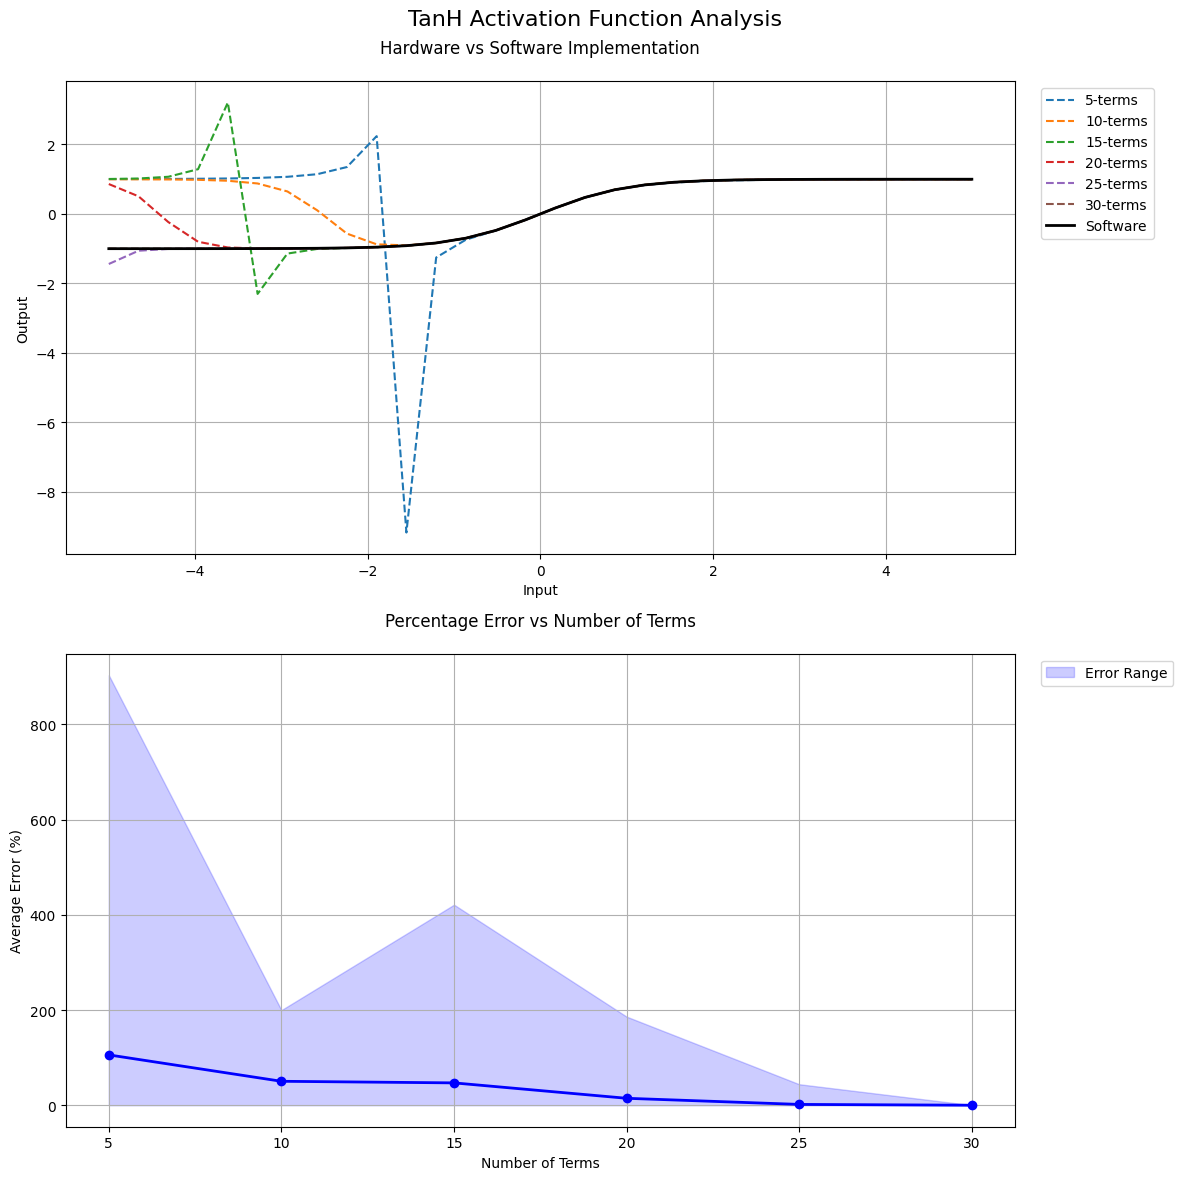

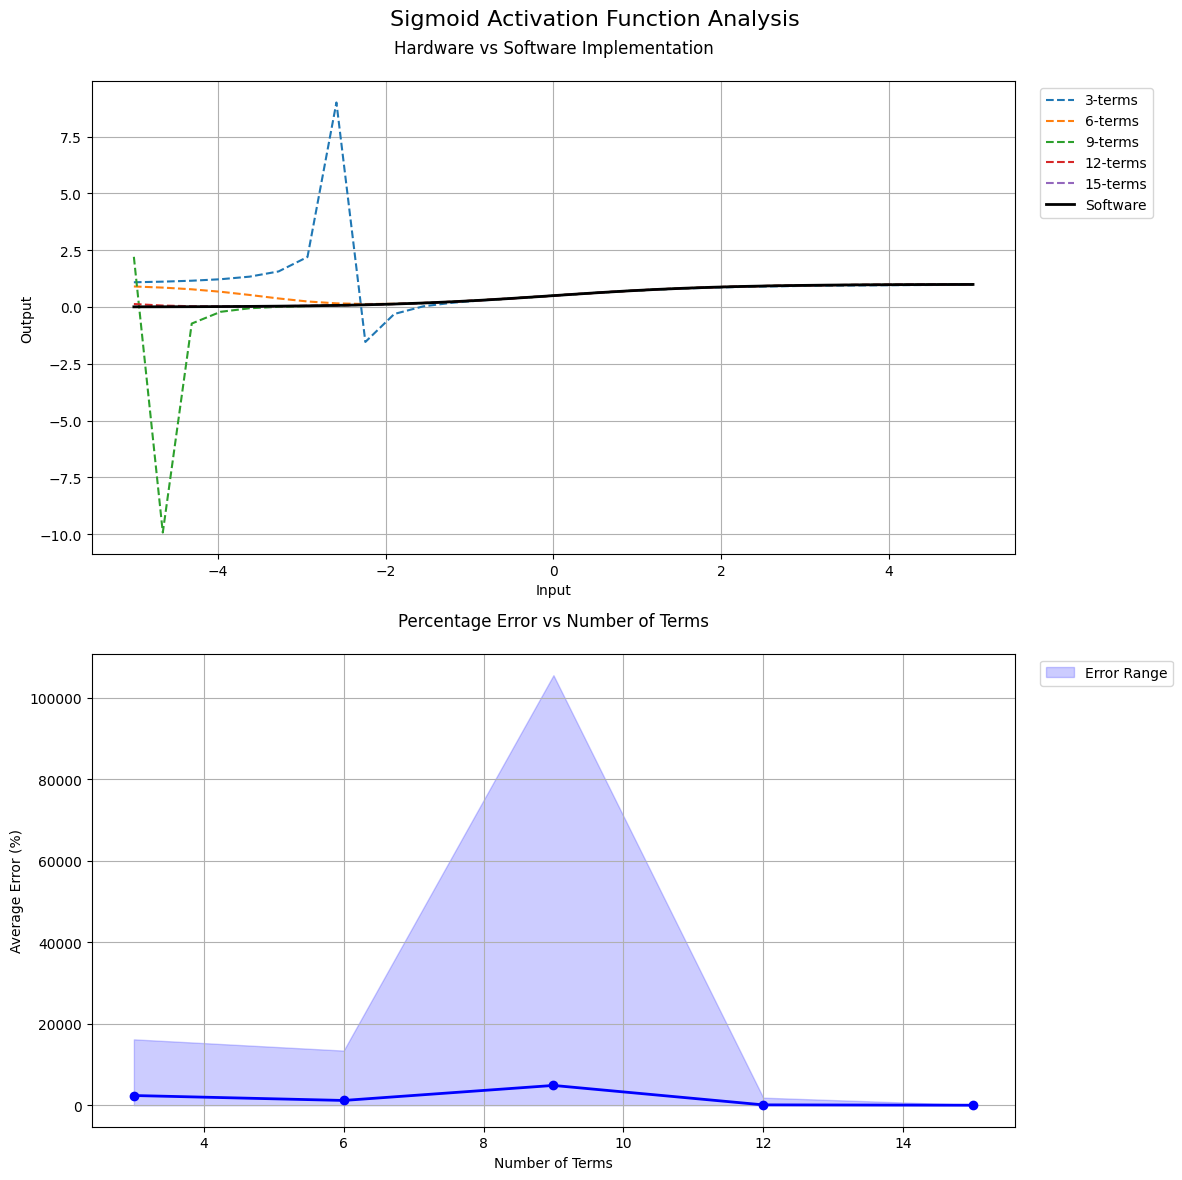

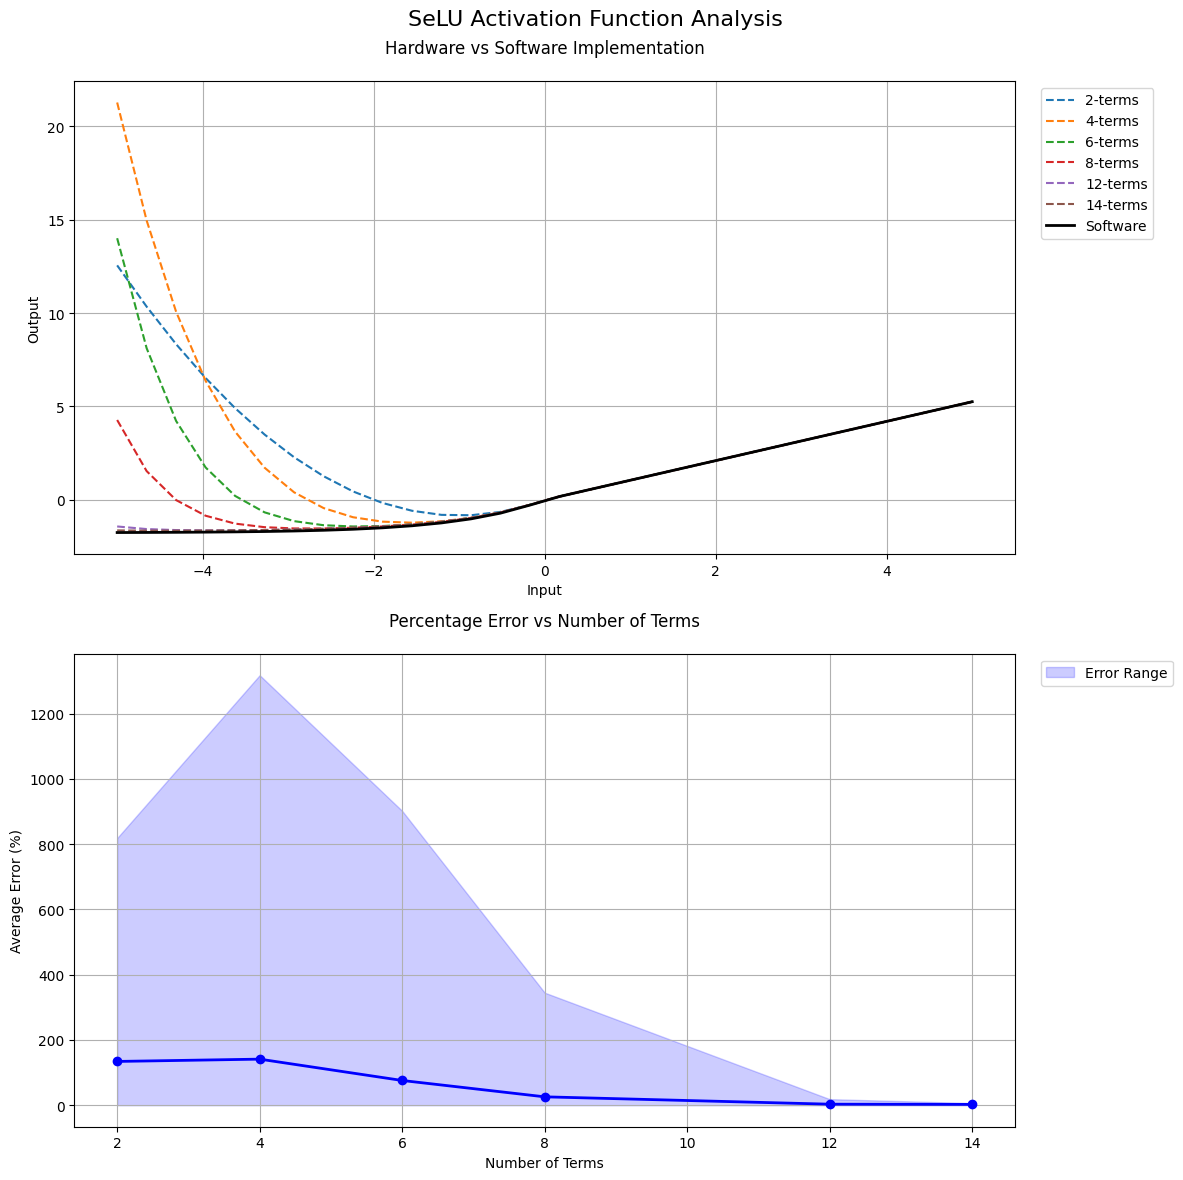

In [10]:
# TanH Analysis
tanh_hw_data = [TanH_5_HW, TanH_10_HW, TanH_15_HW, TanH_20_HW, TanH_25_HW, TanH_30_HW]
tanh_errors = [TanH_5_error, TanH_10_error, TanH_15_error, TanH_20_error, TanH_25_error, TanH_30_error]
tanh_titles = ['5-terms', '10-terms', '15-terms', '20-terms', '25-terms', '30-terms']
fig_tanh = plot_activation_analysis(x, tanh_hw_data, TanH_SW, tanh_errors, tanh_titles, 'TanH Activation Function Analysis')

# Sigmoid Analysis
sigmoid_hw_data = [Sigmoid_3_HW, Sigmoid_6_HW, Sigmoid_9_HW, Sigmoid_12_HW, Sigmoid_15_HW]
sigmoid_errors = [Sigmoid_3_error, Sigmoid_6_error, Sigmoid_9_error, Sigmoid_12_error, Sigmoid_15_error]
sigmoid_titles = ['3-terms', '6-terms', '9-terms', '12-terms', '15-terms']
fig_sigmoid = plot_activation_analysis(x, sigmoid_hw_data, Sigmoid_SW, sigmoid_errors, sigmoid_titles, 'Sigmoid Activation Function Analysis')

# SeLU Analysis
selu_hw_data = [SeLu_2_HW, SeLu_4_HW, SeLu_6_HW, SeLu_8_HW, SeLu_12_HW, SeLu_14_HW]
selu_errors = [SeLu_2_error, SeLu_4_error, SeLu_6_error, SeLu_8_error, SeLu_12_error, SeLu_14_error]
selu_titles = ['2-terms', '4-terms', '6-terms', '8-terms', '12-terms', '14-terms']
fig_selu = plot_activation_analysis(x, selu_hw_data, SeLu_SW, selu_errors, selu_titles, 'SeLU Activation Function Analysis')

plt.show()